In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
subhajournal_drug_recommendations_path = kagglehub.dataset_download('subhajournal/drug-recommendations')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drug-recommendations/Drug_Data.csv


In [ ]:
df= pd.read_csv('/kaggle/input/drug-recommendations/Drug_Data.csv')

In [ ]:
df.head(10)

,drugName,Prescribed_for,Drug_Review,User_Rating,Date,Count_of_Reviews
0,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,05-Mar-17,35
4,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4
5,Zyclara,Keratosis,"""4 days in on first 2 weeks. Using on arms an...",4,03-Jul-14,13
6,Copper,Birth Control,"""I&#039;ve had the copper coil for about 3 mon...",6,06-Jun-16,1
7,Amitriptyline,Migraine Prevention,"""This has been great for me. I&#039;ve been on...",9,21-Apr-09,32
8,Methadone,Opiate Withdrawal,"""Ive been on Methadone for over ten years and ...",7,18-Oct-16,21
9,Levora,Birth Control,"""I was on this pill for almost two years. It d...",2,16-Apr-11,3


In [ ]:
df.iloc[1,2]

'"My son has Crohn&#039;s disease and has done very well on the Asacol.  He has no complaints and shows no side effects.  He has taken as many as nine tablets per day at one time.  I&#039;ve been very happy with the results, reducing his bouts of diarrhea drastically."'

In [ ]:
df.shape

(53766, 6)

In [ ]:
df.isnull().sum()

drugName              0
Prescribed_for      295
Drug_Review           0
User_Rating           0
Date                  0
Count_of_Reviews      0
dtype: int64

In [ ]:
df = df.dropna(subset=['Prescribed_for']).reset_index(drop=True)

In [ ]:
df.isnull().sum()

drugName            0
Prescribed_for      0
Drug_Review         0
User_Rating         0
Date                0
Count_of_Reviews    0
dtype: int64

In [ ]:
counts_drug=df['drugName'].value_counts() #.index for only names

In [ ]:
counts_drug

drugName
Levonorgestrel                       1265
Etonogestrel                         1081
Ethinyl estradiol / norethindrone     869
Nexplanon                             736
Ethinyl estradiol / norgestimate      649
                                     ... 
Stromectol                              1
Loestrin Fe 1 / 20                      1
Onfi                                    1
Nimotop                                 1
FluMist                                 1
Name: count, Length: 2635, dtype: int64

In [ ]:
count_drugs = counts_drug[counts_drug > 50]
print(count_drugs)

drugName
Levonorgestrel                       1265
Etonogestrel                         1081
Ethinyl estradiol / norethindrone     869
Nexplanon                             736
Ethinyl estradiol / norgestimate      649
                                     ... 
OnabotulinumtoxinA                     52
Terbinafine                            52
Methylprednisolone                     51
Etanercept                             51
Gildess Fe 1 / 20                      51
Name: count, Length: 230, dtype: int64


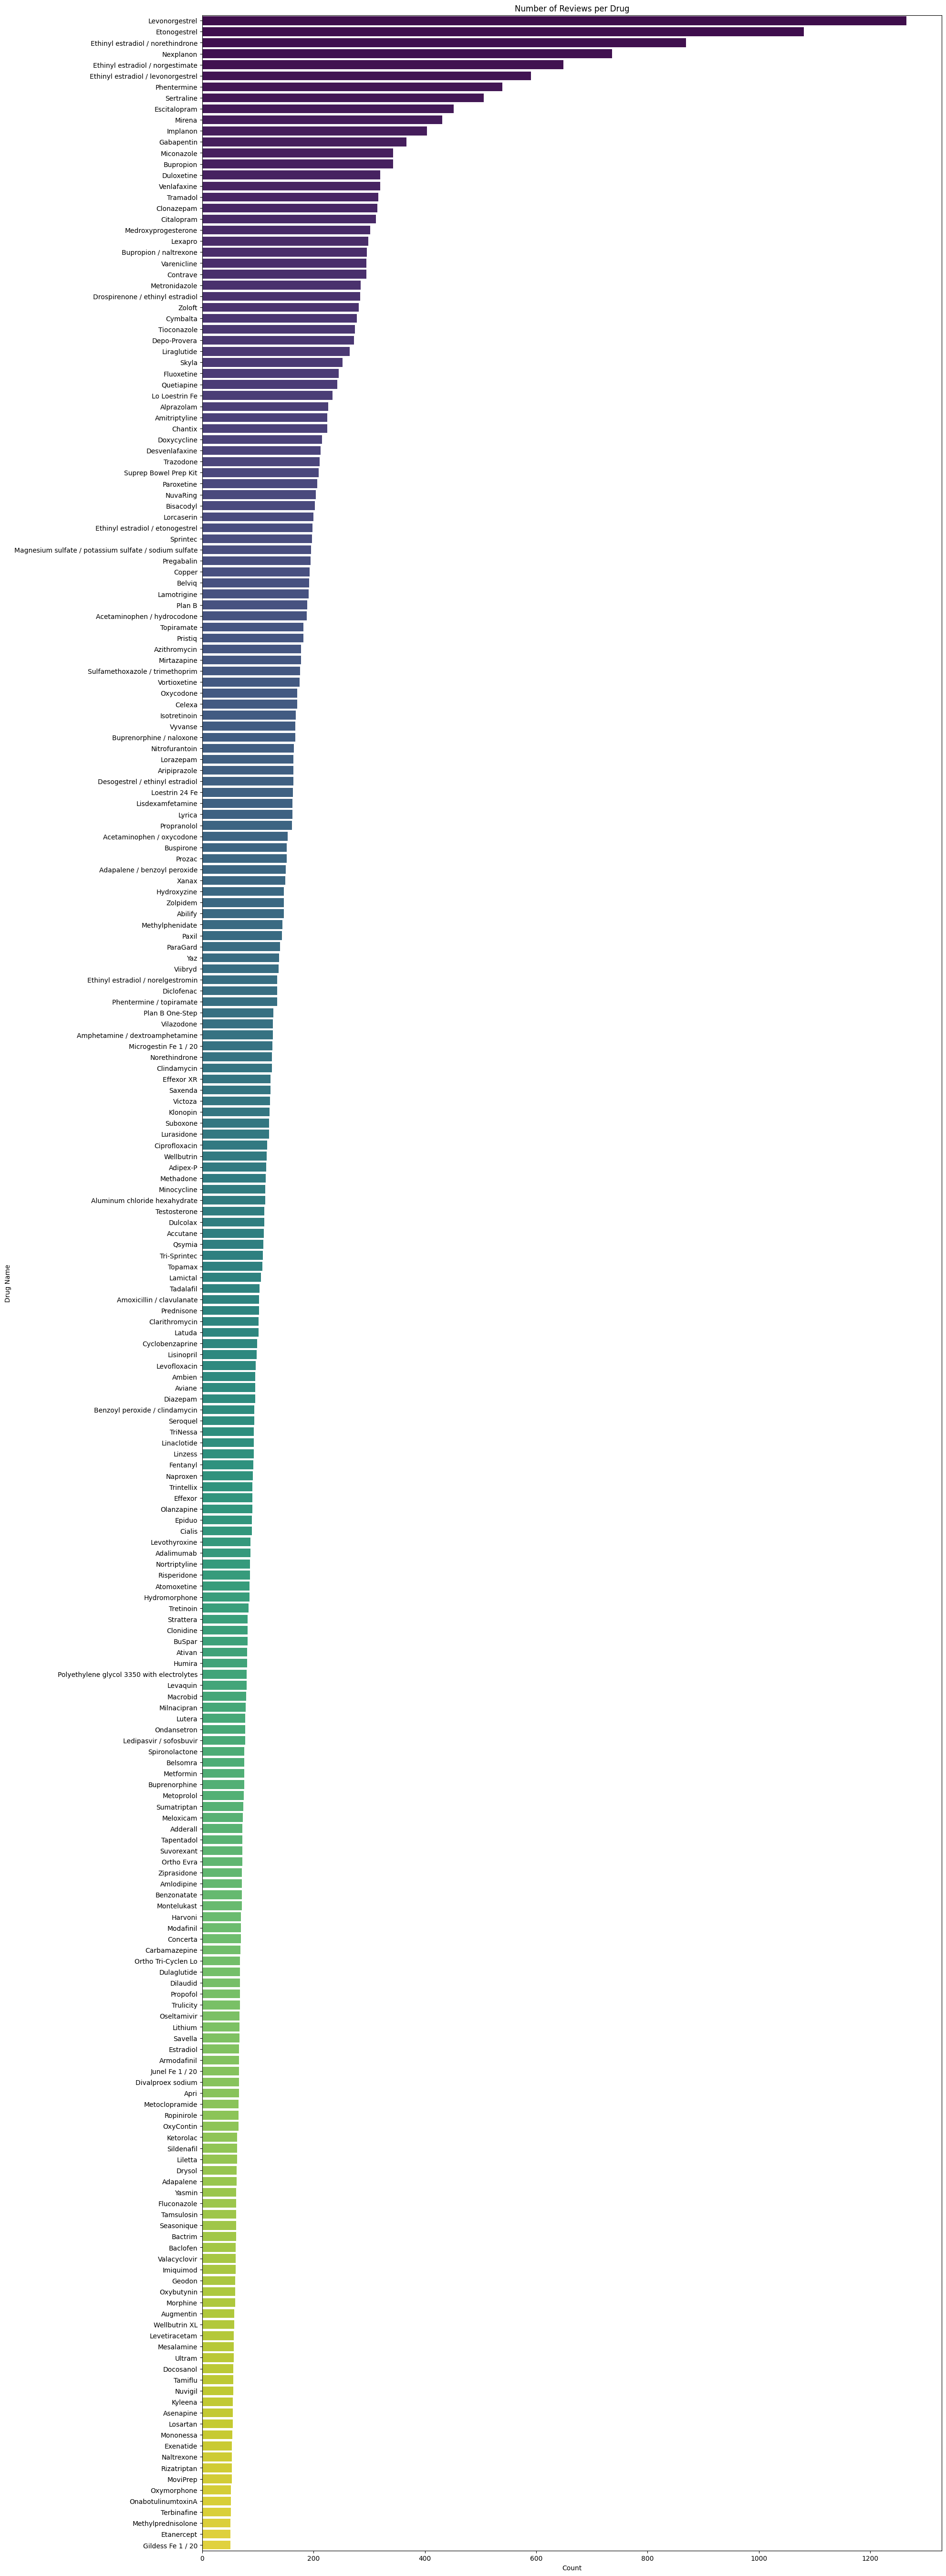

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, max(5, len(count_drugs)*0.3)))
sns.barplot(x=count_drugs.values, y=count_drugs.index, palette="viridis")
plt.title("Number of Reviews per Drug")
plt.xlabel("Count")
plt.ylabel("Drug Name")
plt.show()


In [ ]:
keep_drugs= count_drugs.index
keep_drugs

Index(['Levonorgestrel', 'Etonogestrel', 'Ethinyl estradiol / norethindrone',
       'Nexplanon', 'Ethinyl estradiol / norgestimate',
       'Ethinyl estradiol / levonorgestrel', 'Phentermine', 'Sertraline',
       'Escitalopram', 'Mirena',
       ...
       'Exenatide', 'Naltrexone', 'Rizatriptan', 'MoviPrep', 'Oxymorphone',
       'OnabotulinumtoxinA', 'Terbinafine', 'Methylprednisolone', 'Etanercept',
       'Gildess Fe 1 / 20'],
      dtype='object', name='drugName', length=230)

In [ ]:
df_filtered = df[df['drugName'].isin(keep_drugs)].reset_index(drop=True)

In [ ]:
df_filtered = df_filtered[~df_filtered['Prescribed_for'].str.contains("users found this comment helpful", case=False, na=False)]

In [ ]:
df_filtered.shape

(35319, 6)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_condition = LabelEncoder()
df_filtered['Prescribed_for_enc'] = le_condition.fit_transform(df_filtered['Prescribed_for'])
df_filtered['Prescribed_for_enc'][0]

85

In [ ]:
condition_mapping = dict(zip(le_condition.classes_, le_condition.transform(le_condition.classes_)))

In [ ]:
condition_mapping

{'ADHD': 0,
 'Abnormal Uterine Bleeding': 1,
 'Acne': 2,
 'Acute Nonlymphocytic Leukemia': 3,
 'Acute Otitis Externa': 4,
 'Acute Promyelocytic Leukemia': 5,
 'Adrenocortical Insufficiency': 6,
 'Agitated State': 7,
 'Agitation': 8,
 'Alcohol Dependence': 9,
 'Alcohol Withdrawal': 10,
 'Allergic Reactions': 11,
 'Allergic Rhinitis': 12,
 'Allergic Urticaria': 13,
 'Allergies': 14,
 'Alopecia': 15,
 'Amebiasis': 16,
 'Amenorrhea': 17,
 'Anesthesia': 18,
 'Angina': 19,
 'Ankylosing Spondylitis': 20,
 'Anthrax': 21,
 'Anxiety': 22,
 'Anxiety and Stress': 23,
 'Arrhythmia': 24,
 'Asperger Syndrome': 25,
 'Asthma': 26,
 'Asthma, Maintenance': 27,
 'Atrial Fibrillation': 28,
 'Atrophic Urethritis': 29,
 'Atrophic Vaginitis': 30,
 'Autism': 31,
 'Autoimmune Hemolytic Anemia': 32,
 'Back Pain': 33,
 'Bacterial Endocarditis Prevention': 34,
 'Bacterial Infection': 35,
 'Bacterial Skin Infection': 36,
 'Bacterial Vaginitis': 37,
 'Basal Cell Carcinoma': 38,
 'Benign Essential Trem': 39,
 'Benign

In [ ]:
!pip install -q sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.3 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 9.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.9 MB/s eta 0:00:00:00:0100:01


In [ ]:
from sentence_transformers import SentenceTransformer

2025-09-20 17:39:30.558721: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758389970.769189      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758389970.830995      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
bert_model = SentenceTransformer('all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
review_texts = df_filtered['Drug_Review'].tolist()
embeddings = bert_model.encode(review_texts, show_progress_bar=True)

Batches:   0%|          | 0/1104 [00:00<?, ?it/s]

In [ ]:
embeddings.shape

(35319, 384)

In [ ]:
numeric_features = df_filtered[['User_Rating', 'Count_of_Reviews', 'Prescribed_for_enc']].values

In [ ]:
# Combine embeddings + numeric features
X = np.hstack([embeddings, numeric_features])

In [ ]:
X

array([[ 3.73559259e-02,  3.56496349e-02, -2.18097251e-02, ...,
         1.00000000e+01,  2.20000000e+01,  8.50000000e+01],
       [-5.24474820e-03, -4.97513742e-04, -1.61744915e-02, ...,
         8.00000000e+00,  1.70000000e+01,  8.00000000e+01],
       [ 3.84881161e-02,  7.78620690e-02,  1.18745729e-01, ...,
         9.00000000e+00,  3.00000000e+00,  2.95000000e+02],
       ...,
       [ 2.28414708e-03, -4.75910082e-02,  1.55606931e-02, ...,
         9.00000000e+00,  1.10000000e+01,  2.20000000e+01],
       [-9.79227293e-03, -6.69012964e-02, -9.48131178e-03, ...,
         8.00000000e+00,  7.00000000e+00,  4.40000000e+01],
       [ 3.72530818e-02,  2.88664047e-02, -5.28378449e-02, ...,
         1.00000000e+00,  2.00000000e+01,  2.04000000e+02]])

In [ ]:
y = df_filtered['drugName']
le_drug = LabelEncoder()
y_enc = le_drug.fit_transform(y)
print("Number of unique drugs:", len(le_drug.classes_))

Number of unique drugs: 230


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (28255, 387) Test shape: (7064, 387)


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, top_k_accuracy_score


In [ ]:
model = XGBClassifier(
    objective='multi:softprob',
    num_class=len(le_drug.classes_),
    eval_metric='mlogloss',
    use_label_encoder=False,
    n_jobs=-1
)

In [ ]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=-1, num_class=230, num_parallel_tree=None, ...)

In [ ]:
top3_accuracy = top_k_accuracy_score(y_test, model.predict_proba(X_test), k=3)
print("Top-3 Accuracy:", top3_accuracy)

Top-3 Accuracy: 0.7283408833522084


In [ ]:
def predict_top_k_drugs_bert(review_text, condition_text, user_rating=10, count_reviews=1, k=3):
    cond_enc = le_condition.transform([condition_text])[0]
    review_emb = bert_model.encode([review_text])
    numeric_feats = np.array([[user_rating, count_reviews, cond_enc]])
    X_input = np.hstack([review_emb, numeric_feats])
    probs = model.predict_proba(X_input)[0]
    top_k_idx = np.argsort(probs)[::-1][:k]
    top_k_drugs = le_drug.inverse_transform(top_k_idx)
    top_k_probs = probs[top_k_idx]
    return list(zip(top_k_drugs, top_k_probs))

In [ ]:
predict_top_k_drugs_bert("I feel very depressed and cannot sleep", "Depression")

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[('Sertraline', 0.9148106),
 ('Celexa', 0.012098126),
 ('Mirtazapine', 0.00845467)]

In [ ]:
filtered_rows = df[df['Prescribed_for'] == 'Depression']
filtered_rows2= filtered_rows[filtered_rows['drugName'] == 'Sertraline']
print(filtered_rows2)

         drugName Prescribed_for  \
166    Sertraline     Depression   
611    Sertraline     Depression   
685    Sertraline     Depression   
1300   Sertraline     Depression   
1451   Sertraline     Depression   
...           ...            ...   
52190  Sertraline     Depression   
52475  Sertraline     Depression   
52721  Sertraline     Depression   
52896  Sertraline     Depression   
53285  Sertraline     Depression   

                                             Drug_Review  User_Rating  \
166    "I&#039;ve had depression on and off for years...            3   
611    "I have been using setter alone now for around...            6   
685    "I have been on Zoloft for about 6 weeks. I wa...            9   
1300   "I told myself that if a miracle happened and ...           10   
1451   "I&#039;m in my mid-40&#039;s and have been on...            9   
...                                                  ...          ...   
52190  "I&#039;ve been on Zoloft for 3 weeks (100mg) ...

In [ ]:
import joblib
from sentence_transformers import SentenceTransformer

joblib.dump(model, "xgb_drug_model.pkl")

joblib.dump(le_drug, "le_drug.pkl")
joblib.dump(le_condition, "le_condition.pkl")

bert_model.save("bert_model")


In [ ]:
!zip -r output.zip /kaggle/working/


  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/le_condition.pkl (deflated 52%)
  adding: kaggle/working/output_folder/ (stored 0%)
  adding: kaggle/working/output_folder/output.zip

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


 (stored 0%)
  adding: kaggle/working/bert_model/ (stored 0%)
  adding: kaggle/working/bert_model/1_Pooling/ (stored 0%)
  adding: kaggle/working/bert_model/1_Pooling/config.json (deflated 57%)
  adding: kaggle/working/bert_model/modules.json (deflated 62%)
  adding: kaggle/working/bert_model/sentence_bert_config.json (deflated 4%)
  adding: kaggle/working/bert_model/model.safetensors (deflated 9%)
  adding: kaggle/working/bert_model/tokenizer.json (deflated 71%)
  adding: kaggle/working/bert_model/vocab.txt (deflated 53%)
  adding: kaggle/working/bert_model/tokenizer_config.json (deflated 73%)
  adding: kaggle/working/bert_model/special_tokens_map.json (deflated 80%)
  adding: kaggle/working/bert_model/README.md (deflated 64%)
  adding: kaggle/working/bert_model/config_sentence_transformers.json (deflated 34%)
  adding: kaggle/working/bert_model/2_Normalize/ (stored 0%)
  adding: kaggle/working/bert_model/config.json (deflated 48%)
  adding: kaggle/working/xgb_drug_model.pkl (deflated

In [ ]:
!ls -lh /kaggle/working/


total 208M
drwxr-xr-x 4 root root 4.0K Sep 20 18:50 bert_model
-rw-r--r-- 1 root root 6.9K Sep 20 18:59 le_condition.pkl
-rw-r--r-- 1 root root 3.8K Sep 20 18:59 le_drug.pkl
drwxr-xr-x 2 root root 4.0K Sep 20 18:56 output_folder
-rw-r--r-- 1 root root 177M Sep 20 19:00 output.zip
-rw-r--r-- 1 root root  31M Sep 20 18:59 xgb_drug_model.pkl


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
